### PingLog

In [1]:
# I wonder if I can read the whole file in
ping_file = open("PingLog.txt")

In [2]:
import re
import datetime as dt

In [3]:
# read through one line at a time. if the line matches pattern, pull groups
file_lines = ping_file.readlines()

In [9]:
groups = []
for line in file_lines:
    match = re.match(r"(?P<month>\d{1,2})/(?P<day>\d{1,2})/(?P<year>\d{4}) (?P<hour>\d{1,2}):(?P<minute>\d{2}):(?P<second>\d{2}) (?P<am>[AP]M).+time=(?P<ping>\d+)ms TTL=(?P<ttl>\d+)", line)
    if match:
        # make date and time into datetime
        date = dt.date(year=int(match.group("year")), month=int(match.group("month")), day=int(match.group("day")))
        time = dt.time(hour=int(match.group("hour")), minute=int(match.group("minute")), second=int(match.group("second")))
        line_dt = dt.datetime(year=date.year, month=date.month, day=date.day, hour=time.hour, minute=time.minute, second=time.second)
        if match.group("am") == "PM":
            line_dt = line_dt + dt.timedelta(hours=12)

        group = [line_dt, int(match.group("ping")), int(match.group("ttl"))]
        groups.append(group)

In [8]:
# 4/15/2022 8:57:32 PM - Reply from 172.217.0.46: bytes=32 time=6ms TTL=118
import pandas as pd

In [10]:
lines_df = pd.DataFrame(groups)
lines_df.columns = ["Datetime", "Ping", "TTL"]

In [11]:
lines_df.sample(10)

,Datetime,Ping,TTL
406039,2022-04-20 14:41:47,5,118
332857,2022-04-19 18:11:54,3,118
478075,2022-04-21 10:52:11,6,118
553446,2022-04-22 07:59:43,3,118
171697,2022-04-17 21:04:26,8,118
651895,2022-04-23 11:34:14,4,59
69400,2022-04-16 16:24:59,8,118
379793,2022-04-20 07:20:46,4,118
421605,2022-04-20 19:03:15,8,118
614493,2022-04-23 01:06:05,10,59


In [15]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 15]

<AxesSubplot:xlabel='Datetime'>

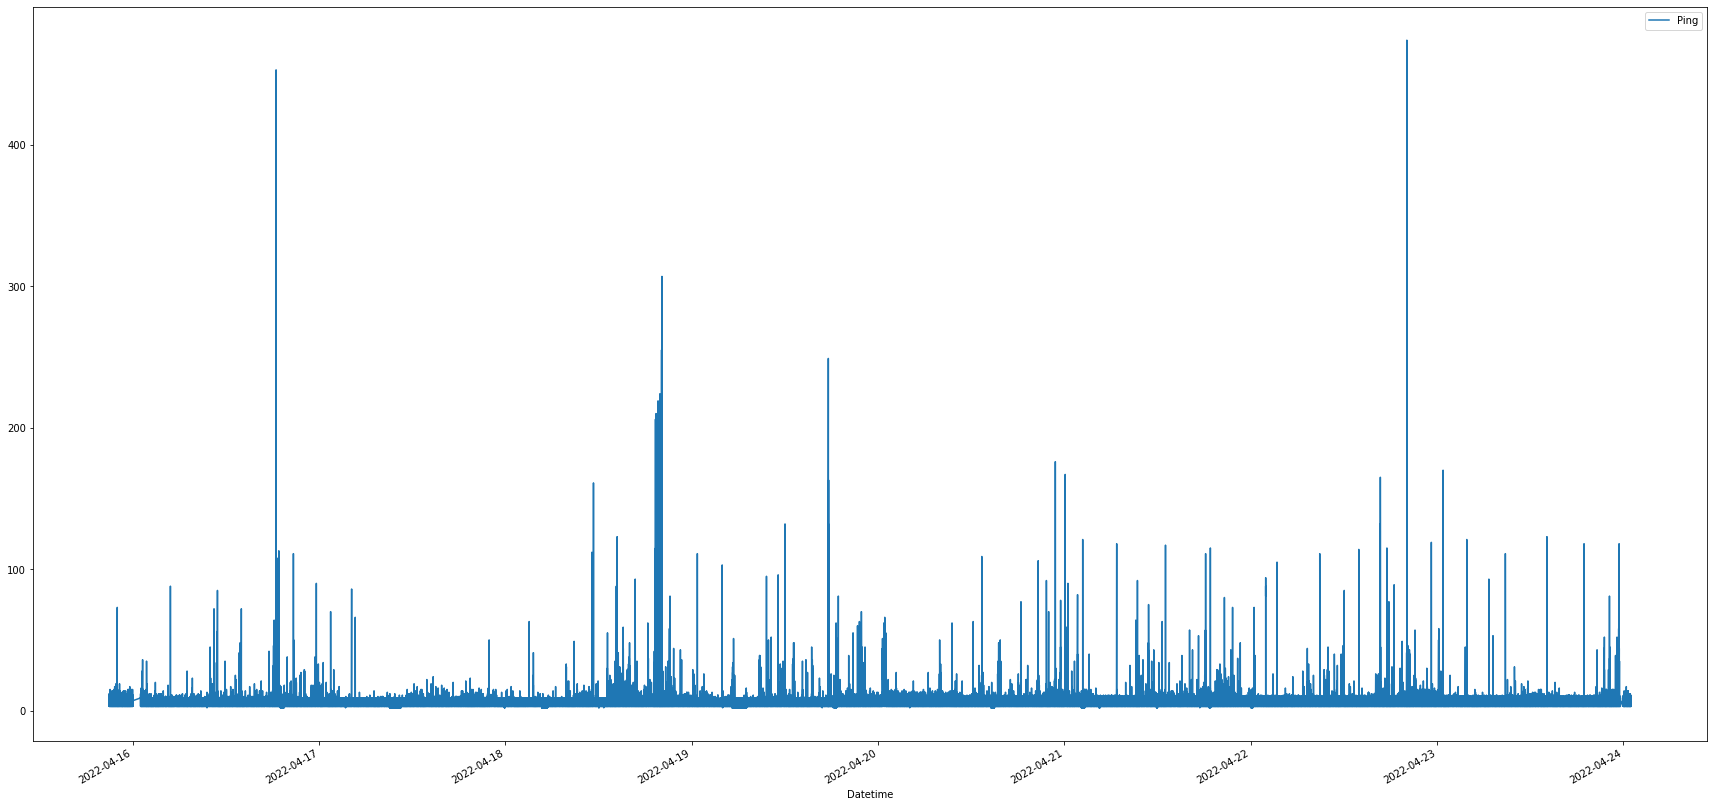

In [17]:
lines_df.plot(x="Datetime", y="Ping")

In [19]:
lines_df.to_csv("validpings.csv")

In [20]:
lines_df["TTL"].unique()

array([118,  59], dtype=int64)